In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import tqdm.notebook as tqdm
import colorsys
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), os.pardir)))
from im_net import datamanager, plotting

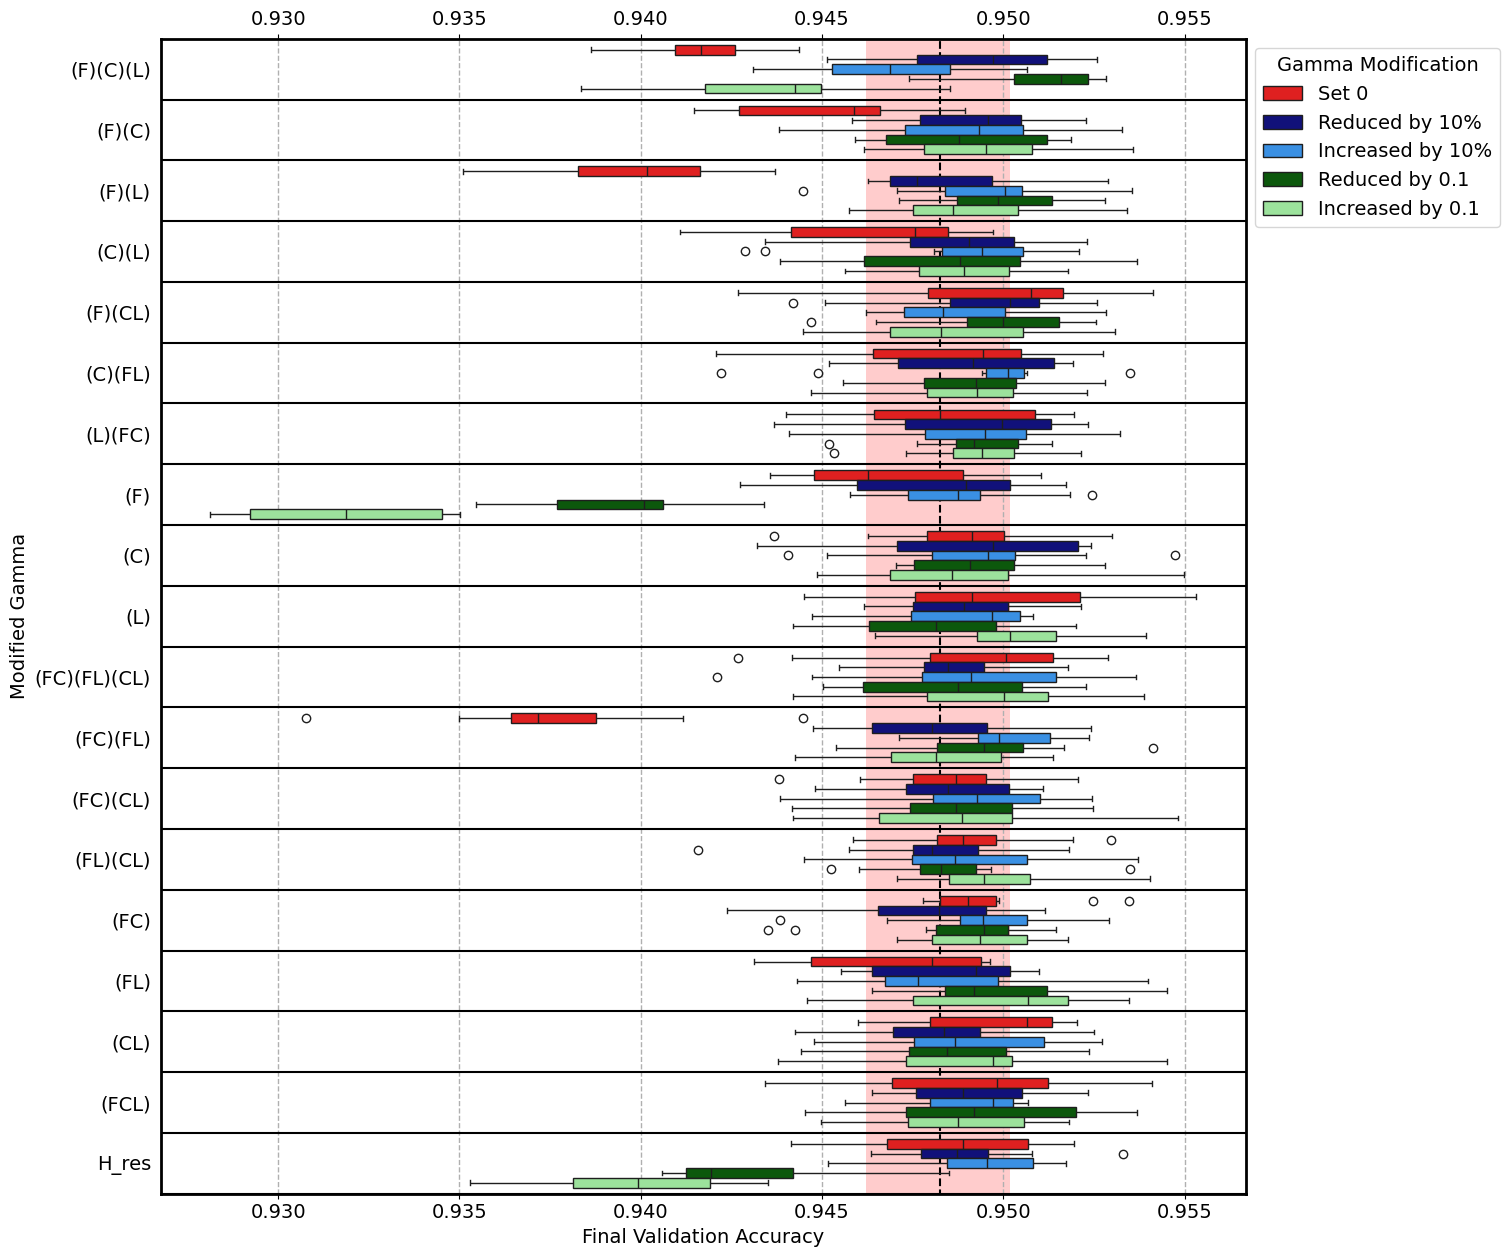

In [58]:
# dm = datamanager.DataManager(f'/data/neuhaus/paper_trivariate_data/MNIST/infomorphic_context_lateral_goal_sensitivity/optimized_1_100/multiruns', mode='analysis', add_run_properties=True)
# dm.all = dm.all[dm.all['finished'] == True]
# dm.all = dm.all.sort_values(by=['layer_params.hidden_layer1.index'])
# # dm.sel = dm.all
# dm.sel = dm.all

# # different types of runs: fix_value (set gamma parameter 0), rel_mod (modulate gamma parameter by +/- 10%), abs_mod (modulate gamma parameter by +/- 0.1)
# # set a flag for the different types of runs
# types = []
# type_idx = []
# for i, row in dm.sel.iterrows():
#     if row['layer_params.hidden_layer1.fix_value'] == 0:
#         types.append('Set 0')
#         type_idx.append(0)
#     elif row['layer_params.hidden_layer1.rel_mod'] == -0.1:
#         types.append('Reduced by 10%')
#         type_idx.append(1)
#     elif row['layer_params.hidden_layer1.rel_mod'] == 0.1:
#         types.append('Increased by 10%')
#         type_idx.append(2)
#     elif row['layer_params.hidden_layer1.abs_mod'] == -0.1:
#         types.append('Reduced by 0.1')
#         type_idx.append(3)
#     elif row['layer_params.hidden_layer1.abs_mod'] == 0.1:
#         types.append('Increased by 0.1')
#         type_idx.append(4)
#     else:
#         types.append('No change')
#         type_idx.append(5)
# print(types)
# dm.sel['type'] = types
# dm.sel['type_idx'] = type_idx
# dm.sel = dm.sel.sort_values(by=['type_idx'])

# performances = dm.load_selected('performance')
# performance_list = []
# for idx, p in enumerate(performances):
#     performance_list.append(p['val_acc'][-1])
# dm.sel['final_val_acc'] = performance_list
# grouped = dm.sel.groupby('layer_params.hidden_layer1.index')['final_val_acc']

# x = np.arange(19)
# reordering = [18,7,9,13,0,1,4,2,8,16,12,11,6,5,17,15,3,10,14]
fig, ax = plt.subplots(1, 1, figsize=(14, 15), dpi=100)
# normal_runs = dm.sel[dm.sel['type_idx'] == 5]
# mean = normal_runs['final_val_acc'].mean()
# mins = normal_runs['final_val_acc'].min()
# maxs = normal_runs['final_val_acc'].max()
ax.vlines(mean, -1, 19, color='black', linestyle='dashed')
ax.axvspan(mins, maxs, alpha=0.2, color='red', zorder=0, linewidth=0)
# ax.fill_between(np.arange(-1,20), mins, maxs, alpha=0.2, color='red', zorder=0, linewidth=0)

# dm.sel = dm.sel[dm.sel['type_idx'] != 5]
ax = sns.boxplot(y="layer_params.hidden_layer1.index", x="final_val_acc",hue='type', orient='h', palette=["red", 'darkblue', 'dodgerblue', 'darkgreen', 'lightgreen'], data=dm.sel)

# handles, labels = ax.get_legend_handles_labels()
# handles = [h for h, lbl, prev in zip(handles, labels, [None] + labels) if lbl != prev]
ax.legend(handles=handles, fontsize=20, title='Gamma Modification')
ax.set_xlabel('Final Validation Accuracy', fontsize=14)
ax.set_ylabel('Modified Gamma', fontsize=14)
ax.set_yticks(x)
[ax.axhline(x+.5,color='k') for x in ax.get_yticks()]
labels = ["(F)(C)(L)","(F)(C)","(F)(L)","(C)(L)","(F)(CL)","(C)(FL)","(L)(FC)","(F)","(C)","(L)","(FC)(FL)(CL)","(FC)(FL)","(FC)(CL)","(FL)(CL)","(FC)","(FL)","(CL)","(FCL)","H_res"]
ax.set_yticklabels(labels, fontsize=14)
ax.grid(True, axis='x', linestyle='--', linewidth=1)
ax.tick_params(labelbottom=True, labeltop=True, labelleft=True, labelright=False,
                     bottom=True, top=True, left=False, right=False)
#increase spine width
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize=14, title_fontsize=14)
ax.tick_params(axis='x', labelsize=14)
fig.savefig('Gamma_Sensitivity_MNIST.pdf', bbox_inches='tight')

In [352]:
dm = datamanager.DataManager(f'/data/neuhaus/paper_trivariate_data/MNIST/infomorphic_context_lateral_goal_sensitivity/optimized_1_100/multiruns/2024-05-15/16-37-10', mode='analysis', add_run_properties=True)

performances = dm.load_selected('performance')
performance_list = []
for idx, p in enumerate(performances):
    performance_list.append(p['val_acc'][-1])

normal_performance = np.median(performance_list)

dm = datamanager.DataManager(f'/data/neuhaus/paper_trivariate_data/MNIST/infomorphic_context_lateral_goal_sensitivity/optimized_1_100/multiruns/2024-05-13/13-41-34', mode='analysis', add_run_properties=True)
print('Number of runs:', len(dm.all))
dm.all = dm.all[dm.all['finished'] == True]
dm.sel = dm.all[dm.all['layer_params.hidden_layer1.fix_value'] == 0]
performances = dm.load_selected('performance')
performance_list = []
param_antichain = ["(F)(C)(L)","(F)(C)","(F)(L)","(C)(L)","(F)(CL)","(C)(FL)","(L)(FC)","(F)","(C)","(L)","(FC)(FL)(CL)","(FC)(FL)","(FC)(CL)","(FL)(CL)","(FC)","(FL)","(CL)","(FCL)","H_res"]

for idx, p in enumerate(performances):
    performance_list.append(p['val_acc'][-1])
dm.sel['final_val_acc'] = performance_list

dm.sel['param_name'] = dm.sel['layer_params.hidden_layer1.index'].apply(lambda x: param_antichain[x])
grouped = dm.sel.groupby('layer_params.hidden_layer1.index')['final_val_acc']

index = grouped.median().sort_values(ascending=False).index
label_order = [param_antichain[i] for i in index]
perf = grouped.median()
perf_change_ordered = [normal_performance-perf[i] for i in index]
for i in index:
    print(i, param_antichain[i], grouped.median()[i])

Number of runs: 190
4 (F)(CL) 0.95075613
16 (CL) 0.95063937
10 (FC)(FL)(CL) 0.95007145
17 (FCL) 0.9498291
5 (C)(FL) 0.9494363
9 (L) 0.9491409
8 (C) 0.9491338
14 (FC) 0.94901526
18 H_res 0.94888437
13 (FL)(CL) 0.94887197
12 (FC)(CL) 0.94869685
6 (L)(FC) 0.9482492
15 (FL) 0.9480246
3 (C)(L) 0.9475682
7 (F) 0.94627845
1 (F)(C) 0.94588923
0 (F)(C)(L) 0.9416716
2 (F)(L) 0.94017494
11 (FC)(FL) 0.9371621


0.9512525796890259
0.9512525796890259
0.9527393579483032
0.9494646489620209
0.9528868496417999
0.9692976474761963


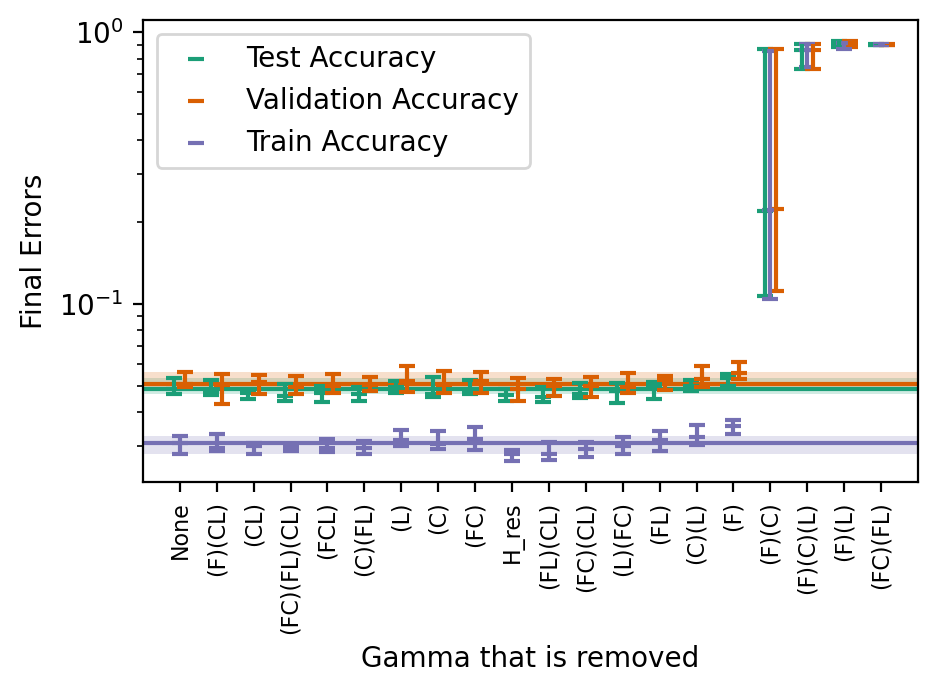

In [351]:
dm = datamanager.DataManager(f'/data/neuhaus/paper_trivariate_data/MNIST/infomorphic_context_lateral/optimized_1_100_modified/multiruns/2024-05-19/20-16-25', mode='analysis', add_run_properties=True)
dm.all = dm.all[~dm.all['layer_params.hidden_layer1.num_zero_gammas'].isna()]
dm.all = dm.all.sort_values(by=['layer_params.hidden_layer1.num_zero_gammas'])
dm.sel = dm.all
num_zero_gammas = list(dm.sel['layer_params.hidden_layer1.num_zero_gammas'])
seeds = list(dm.sel['exp_params.seed'])
atom_labels = ['None','(F)(CL)', '(CL)', '(FC)(FL)(CL)', '(FCL)', '(C)(FL)', '(L)', '(C)', '(FC)', 'H_res', '(FL)(CL)', '(FC)(CL)', '(L)(FC)', '(FL)', '(C)(L)', '(F)', '(F)(C)', '(F)(C)(L)', '(F)(L)', '(FC)(FL)']

#three colors, one for each type of performance in rgb
colors = ['#1b9e77','#d95f02','#7570b3']
performances = dm.load_selected('performance')
fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=200)
final_perfs = np.zeros((20, 10,3))
epoch = 100
for idx, p in enumerate(performances):
    final_perfs[int(num_zero_gammas[idx]), int(seeds[idx])] = [p['test_acc'][epoch], p['val_acc'][epoch], p['train_acc'][epoch]]
labels = ["Test Accuracy", "Validation Accuracy", "Train Accuracy"]
final_perfs = final_perfs.T
for i in range(3):
    s=0
    if i==0:
        s=-0.15
    elif i==1:
        s=0.15
    ax.scatter(np.arange(20)+s, 1-final_perfs.min(axis=1)[:][i], color=colors[i], marker='_')
    ax.scatter(np.arange(20)+s, 1-final_perfs.max(axis=1)[:][i], color=colors[i], marker='_')
    ax.scatter(np.arange(20)+s, 1-np.median(final_perfs,axis=1)[:][i], color=colors[i], marker='_', label=labels[i])
    ax.vlines(np.arange(20)+s, 1-final_perfs.min(axis=1)[:][i], 1-final_perfs.max(axis=1)[:][i], color=colors[i])
    print(np.median(final_perfs, axis=1)[0][i])
    print(np.median(final_perfs, axis=1)[i][0])
    ax.axhline(1-np.median(final_perfs, axis=1)[i][0], color=colors[i],zorder=0)
    ax.fill_between(np.arange(22)-1, 1-final_perfs.min(axis=1)[i][0], 1-final_perfs.max(axis=1)[i][0], alpha=0.2, color=colors[i], zorder=0, linewidth=0)
ax.set_xlabel('Gamma that is removed')
ax.set_xbound(-1,20)
ax.set_ylabel('Final Errors')
ax.set_yscale('log')
ax.legend()
ax.set_xticks(np.arange(0, 20))
ax.set_xticklabels(atom_labels, rotation=90, fontsize=8)
fig.savefig('../../CumulativeZeroGamma.pdf', bbox_inches='tight')